# CV exercise 5 – Super-Resolution

In this exercise, we will use the ESRGAN super-resolution model to increase the resolution of an image, and we will compare its output to the results of naive interpolation.

**Note:** It is recommended to run this exercise on Google Colab with GPU acceleration enabled.

## Part 1: Data loading and preprocessing

We will use the [DIV2K](https://data.vision.ee.ethz.ch/cvl/DIV2K/) image super-resolution dataset for this problem. See the dataset webpage for more information on its contents.

**Questions:**
1. Download the contents of DIV2K ["Validation Data Track 1 bicubic downscaling x4 (LR images)"](http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip). Note: In Google Colab, it is much faster to run a code cell containing `! wget (URL)` in order to download, rather than downloading the data locally and uploading to the Google Colab runtime.
2. Unzip the archive and browse the images. Note: you may unzip the archive in Colab by running a code cell containing `! unzip (filename)`.
3. We will use the image `0812x4.png` for our tests. Using OpenCV, load this image as a NumPy array `img_hr`.
4. Convert `img_hr` to RGB format, and crop it by removing its last few rows and/or columns so that it has dimensions that are multiples of four. What is the final shape of `img_hr`?
5. Display the image `img_hr`.
6. To create the low-resolution version of our image, we will use the Pillow image processing library. We could do this with OpenCV but the Pillow bicubic downscaling method gives slightly better results. Uncomment the code below and fill in the missing values to bicubically downscale the image to a new low-resolution image `img_lr` that is 1/4 as wide and 1/4 as high as `img_hr`.
7. Display `img_lr`. How does it look compared to `img_hr`?

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
# ! unzip /content/DIV2K_valid_LR_bicubic_X4.zip

Archive:  /content/DIV2K_valid_LR_bicubic_X4.zip
   creating: DIV2K_valid_LR_bicubic/X4/
  inflating: DIV2K_valid_LR_bicubic/X4/0810x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0866x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0882x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0836x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0805x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0881x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0880x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0872x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0853x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0862x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0806x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0846x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0897x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0812x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0898x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0896x4.png  
  inflating: DIV2K_valid_LR_bicubic/X4/0848x4.png  
  inflating: DIV2K_valid_LR

In [61]:
import cv2
import matplotlib.pyplot as plt


In [62]:
# // read Image
img_hr= cv2.imread('DIV2K_valid_LR_bicubic/X4/0812x4.png' )

In [63]:
#   Creating a function which will first load the image , convert it to RGB, crop it to mulpiplt of 4 and print out final dimension.
# def converter(img):
#   img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   img_cropped= img_rgb[:300, :340, ::]
#   print(img_cropped.shape)
#   return plt.imshow(img_cropped)


In [64]:
type(img_hr)

numpy.ndarray

In [65]:

# img= converter(img_hr)

img_rgb = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
img_cropped= img_rgb[:300, :340, ::]
img_hr= img_cropped
print(img_hr.shape)

(300, 340, 3)


In [66]:
img_hr.shape[:][2] /4

0.75

In [67]:
## CODE FOR QUESTION 6 ###
from PIL import Image
import numpy as np

img_lr = np.asarray(Image.fromarray(img_hr)
            .resize((int(img_hr.shape[:][1]/4) , int(img_hr.shape[:][0]/4))  , Image.BICUBIC)
            )

In [68]:
img_lr.shape

(75, 85, 3)

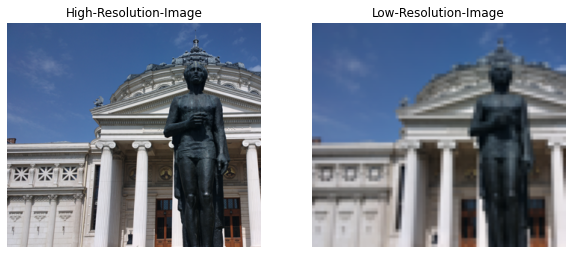

In [69]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title("High-Resolution-Image")
plt.axis('off')
plt.imshow(img_hr)

# Low Res
plt.subplot(122)
plt.title("Low-Resolution-Image")
plt.axis('off')

plt.imshow(img_lr)


In [70]:
img_lr.shape

(75, 85, 3)

# /////////////

## Loading the ESRGAN model

We will now load the ESRGAN model using the saved model available from [TensorFlow Hub](https://www.tensorflow.org/hub).

**Questions:**
8. Skim the TensorFlow Hub model documentation at  https://tfhub.dev/captain-pool/esrgan-tf2/1. What part of the ESRGAN model is available here? What does it assume about its inputs?
9. Using the code below, load the saved ESRGAN model. Note: With GPU acceleration enabled this should take about 5 seconds to load.
10. The model distributed on TF Hub is not a TF Keras model, so it does not have all of the useful Keras methods like `.summary()` available for use. However, we can examine it with the low-level TensorFlow API. Use the code below to count the number of weights in the model.
11. Create a variable `img_tensor` that contains `img_lr` converted to be a TensorFlow tensor. (Recall from the Intro to TensorFlow lecture how to convert NumPy arrays to tensors.) Make sure of the following:
  * `img_tensor` should be in BHWC format (batch-height-width-cannel) and have shape `(1, 96, 127, 3)`
  * `img_tensor` should contain data with type `tf.float32`. (Hint: use the `dtype=` parameter.)
12. Run `model(img_tensor)` to upscale the low-res image. Use the magic command `%time` to measure the time that this takes, and convert the output to a NumPy array. Save the result in a variable `output`. What is the type and shape of `output`?
13. Because the model outputs a tensor object containing floating point values, we must do some preprocessing. Perform the following steps and save the output in a variable `output_post`:
  * Convert to a NumPy array
  * Convert to HWC format (remove batch dimension)
  * Clip values to be between 0 and 255 (recommendation: use `np.clip(...)`)
  * Convert values in `output_post` to data type `np.uint8` (recommendation: use `.astype(...)`). Note: Later steps will not work if you use the regular Python `int` data type.

---
### The ESRGAN assumes inputs to be: 
* The image must be a float32 image, converted using tf.cast(image, tf.float32).
* The image must be of 4 dimensions, [batch_size, height, width, 3]. To perform super resolution on a single image, use tf.expand_dims(image, 0) to add the batch dimension.

In [71]:
### CODE FOR QUESTION 9 ###
import tensorflow_hub as hub

SAVED_MODEL_PATH = 'https://tfhub.dev/captain-pool/esrgan-tf2/1'
%time model = hub.load(SAVED_MODEL_PATH)

CPU times: user 6.29 s, sys: 378 ms, total: 6.66 s
Wall time: 6.49 s


In [72]:
### CODE FOR QUESTION 10
### Calculating Number of Weights
np.sum([np.prod(v.get_shape().as_list()) for v in model.variables])

4605955

In [73]:
import tensorflow as tf

In [74]:
#  Converting Image to tensor
img_tensor= tf.constant(img_lr)

In [75]:
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = tf.expand_dims(img_tensor, axis= 0)
img_tensor.shape

TensorShape([1, 75, 85, 3])

In [76]:

%time output= model(img_tensor)
output = output.numpy()
output.shape

CPU times: user 1.48 s, sys: 26 ms, total: 1.51 s
Wall time: 1.45 s


(1, 300, 340, 3)

In [77]:
output_post= np.squeeze(output).clip(0, 255)
output_post = output_post.astype(int)

In [78]:
output_post.dtype

dtype('int64')

In [79]:
output_post.shape

(300, 340, 3)

# ////////

In [80]:
new_x= 85*4
new_y= 75* 4

img_bicubic= cv2.resize(img_lr, (new_x, new_y), interpolation= cv2.INTER_CUBIC)
img_bilinear= cv2.resize(img_lr, (new_x, new_y), interpolation= cv2.INTER_LINEAR)

In [81]:
img_bicubic.shape, img_bilinear.shape, output_post.shape

((300, 340, 3), (300, 340, 3), (300, 340, 3))

In [82]:
psnr_bi=cv2.PSNR(img_hr,img_bicubic )

In [83]:
psnr_li= cv2.PSNR(img_hr, img_bilinear )

In [85]:
# esnr_li= cv2.PSNR(img_hr, output_post )
output_post.shape

(300, 340, 3)

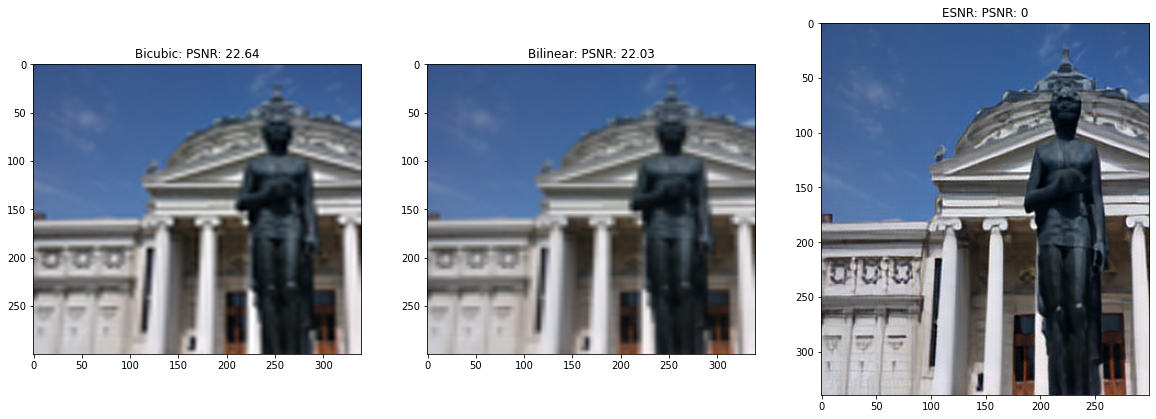

In [54]:
# psnr_out= cv2.PSNR(img_hr, output_post )
plt.figure(figsize= (20, 20))
plt.subplot(131)
plt.title(f"Bicubic: PSNR: {np.round(psnr_bi, 2)}")
plt.imshow(img_bicubic)

plt.subplot(132)
plt.title(f"Bilinear: PSNR: {np.round(psnr_li, 2)}")
plt.imshow(img_bilinear)

plt.subplot(133)
plt.title(f"ESNR: PSNR: {0}")
plt.imshow(output_post)

ESNR Image has the best results

## Evaluating results

We will now examine the output of ESRGAN and compare it to naive interpolation upscaling algorithms.

**Questions:**
14. Using OpenCV, use bilinear and bicubic interpolation to scale `img_lr` to be four times as large in both dimensions. Store the resulting images in variables `img_bilinear` and `img_bicubic`. Make sure that `output_post`, `img_bilinear`, and `img_bicubic` all have the same shape.
15. Using `cv2.PSNR(...)`, calculate PSNR values for all three upscaled images relative to the original image `img_hr`.
16. Using `plt.subplots(1, 3, figsize=(20, 20))`, show all three upscaled images side-by-side. Each image should have a title displayed containing its upscaling algorithm name (bilinear/bicubic/ESNR) and its PSNR value. Round the PSNR values to 2 decimal points to the titles are easy to read.
17. Which image has the best PSNR value? Does this make sense?
18. Try running all of these steps (running ESRGAN and comparing its output to naive interpolation) on another image from the DIV2K dataset, save the final subplot comparing the different upscaled images, and upload it to the class Slack channel.

**Final note:** You may also try running ESRGAN on your own images from other sources, but it may be sensitive to the size of the input image or the presence of [artifacts](https://en.wikipedia.org/wiki/Visual_artifact) in the image due to reasons such as compression (e.g. jpeg images).

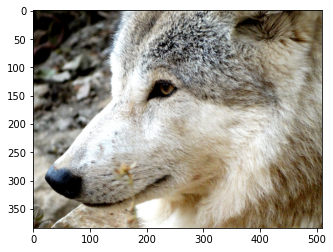

In [56]:
new_img= cv2.imread("DIV2K_valid_LR_bicubic/X4/0805x4.png")
new_img= cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [86]:

# img= converter(img_hr)

# img_rgb = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
img_cropped= new_img[:300, :340, ::]
img_hr= img_cropped
print(img_hr.shape)

(300, 340, 3)


In [87]:
# img_hr.shape[:][2] /4

In [88]:
## CODE FOR QUESTION 6 ###
from PIL import Image
import numpy as np

img_lr = np.asarray(Image.fromarray(img_hr)
            .resize((int(img_hr.shape[:][1]/4) , int(img_hr.shape[:][0]/4))  , Image.BICUBIC)
            )

In [89]:
img_lr.shape

(75, 85, 3)

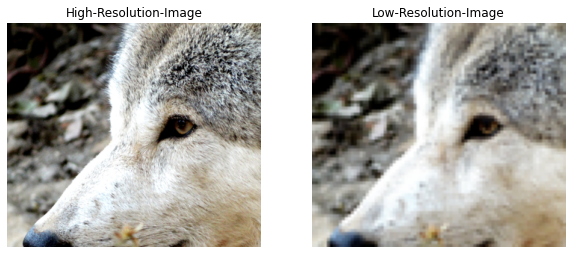

In [90]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title("High-Resolution-Image")
plt.axis('off')
plt.imshow(img_hr)

# Low Res
plt.subplot(122)
plt.title("Low-Resolution-Image")
plt.axis('off')

plt.imshow(img_lr)


In [91]:
img_lr.shape

(75, 85, 3)

In [92]:
#  Converting Image to tensor
img_tensor= tf.constant(img_lr)

In [93]:
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = tf.expand_dims(img_tensor, axis= 0)
img_tensor.shape

TensorShape([1, 75, 85, 3])

In [94]:

%time output= model(img_tensor)
output = output.numpy()
output.shape

CPU times: user 22.5 ms, sys: 0 ns, total: 22.5 ms
Wall time: 23.6 ms


(1, 300, 340, 3)

In [95]:
output_post= np.squeeze(output).clip(0, 255)
output_post = output_post.astype(int)

In [96]:
output_post.dtype

dtype('int64')

In [97]:
output_post.shape

(300, 340, 3)

In [98]:
new_x= 85*4
new_y= 75* 4

img_bicubic= cv2.resize(img_lr, (new_x, new_y), interpolation= cv2.INTER_CUBIC)
img_bilinear= cv2.resize(img_lr, (new_x, new_y), interpolation= cv2.INTER_LINEAR)

In [99]:
img_bicubic.shape, img_bilinear.shape, output_post.shape

((300, 340, 3), (300, 340, 3), (300, 340, 3))

In [100]:
psnr_bi=cv2.PSNR(img_hr,img_bicubic )

In [101]:
psnr_li= cv2.PSNR(img_hr, img_bilinear )

In [103]:
# esnr_li= cv2.PSNR(img_hr, output_post )
output_post.shape

(300, 340, 3)

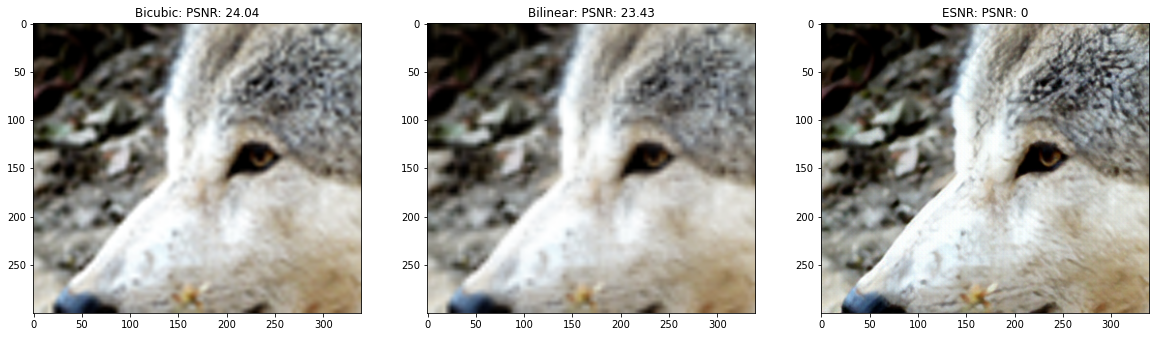

In [104]:
# psnr_out= cv2.PSNR(img_hr, output_post )
plt.figure(figsize= (20, 20))
plt.subplot(131)
plt.title(f"Bicubic: PSNR: {np.round(psnr_bi, 2)}")
plt.imshow(img_bicubic)

plt.subplot(132)
plt.title(f"Bilinear: PSNR: {np.round(psnr_li, 2)}")
plt.imshow(img_bilinear)

plt.subplot(133)
plt.title(f"ESNR: PSNR: {0}")
plt.imshow(output_post)